In [79]:
###importa as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #grafico
import seaborn as sns #grafico
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Carregar o aquivo

dados = pd.read_csv('./horasDeEstudo.csv')

# VISUALIZAR INFORMAÇÕES BÁSICAS DO DATAFRAME
#  Visualizar o cabeçalho
dados.head(1)

#visualizar o final do dataframe
dados.tail(1)

#verificar os tipos de dados 
dados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [80]:
## Gerar análise exploratório dos dados:
#verificar se há nulos
#Calcula a quantidade de informações nulas
dados.isnull().sum()

#resumo estatistico do dataframe
dados.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [81]:
#Analisar a correlação entre as variáveis
dados.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


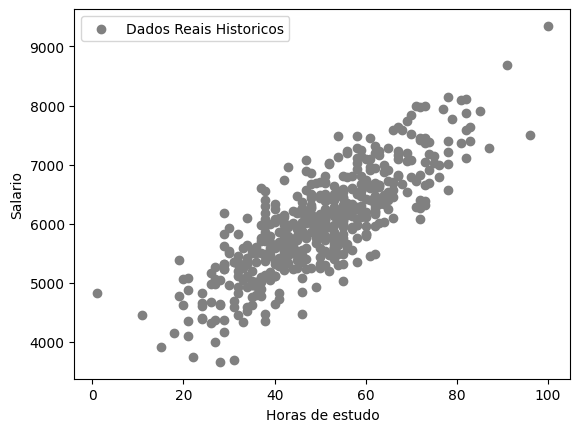

In [82]:
#criar um gráfico de dispersão

plt.scatter(
    data = dados, # conjunto de dados
    x=	'horas_estudo_mes', #variavel preditora
    y = 'salario', #variavel resposta
    label = 'Dados Reais Historicos', #rotulo
    color = 'gray', #cor
)
plt.xlabel('Horas de estudo')
plt.ylabel('Salario')
plt.legend()


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

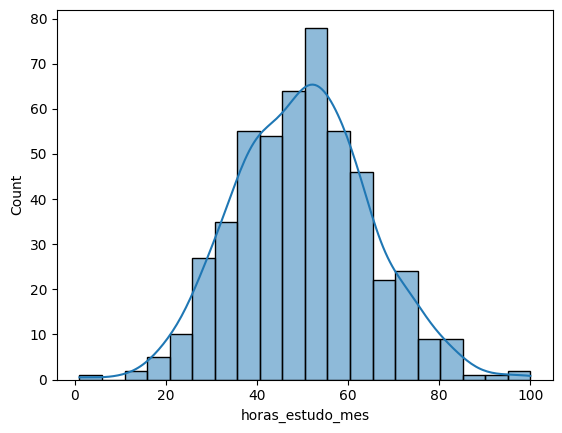

In [83]:
#construir um histograma para analisar o comportamento da variavel preditora (X)

sns.histplot(
data = dados,
x= 'horas_estudo_mes',
kde = True
)

In [84]:
## Preparar os dados
#Separar as variáveis
x = dados['horas_estudo_mes']
y =  dados['salario']

#verificar o tipo de dado e  a quantidade de elementos
print(f'o tipo de dado da variável X é {type(x)}')
print(f'A quantidade de dados da variável X é {len(x)}')

o tipo de dado da variável X é <class 'pandas.core.series.Series'>
A quantidade de dados da variável X é 500


In [85]:
# Converter a variável x para uma matriz 1x1
#converter para array
x = np.array(x)

#np.reshape(linhas, colunas)

x= x.reshape(-1,1)

#separando o treino
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)


# tamanho dos dados de treino
print('Quantidade de elementos para treinamento', len(x_train))

# tamanho dos dados (amostras) para teste
print('Quantidade de elementos para teste', len(x_test))
print('Quantidade de elementos total:',len(x))




Quantidade de elementos para treinamento 400
Quantidade de elementos para teste 100
Quantidade de elementos total: 500


In [86]:
##treinamento o modelo
#inicializar o algoritmo para treino
modelo = LinearRegression()

#treinar o modelo
modelo.fit(x_train,y_train)

LinearRegression()

In [87]:
#exibir os coeficientes

print('Coeficiente angular(a):',modelo.coef_)
print('coeficiente linear(b):', modelo.intercept_)



Coeficiente angular(a): [48.18185277]
coeficiente linear(b): 3596.783724372753


In [88]:
##Deploy do modelo
#inserir os valores para previsão
horasEstudo = np.array([[50]])

#realizar a previsão
salario = modelo.predict(horasEstudo)

#resultado
print(f'para {horasEstudo}horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de {salario}')

para [[50]]horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de [6005.87636294]


In [89]:
#inserir os valores para previsão
horasEstudo = np.array([[48]])

#realizar a previsão
salario = modelo.predict(horasEstudo)

#resultado
print(f'para {horasEstudo}horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de {salario}')

para [[48]]horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de [5909.5126574]


In [90]:
#inserir os valores para previsão
horasEstudo = np.array([[65]])

#realizar a previsão
salario = modelo.predict(horasEstudo)

#resultado
print(f'para {horasEstudo}horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de {salario}')

para [[65]]horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de [6728.60415452]


In [ ]:
#inserir os valores para previsão
horasEstudo = np.array([[73]])

#realizar a previsão
salario = modelo.predict(horasEstudo)

#resultado
print(f'para {horasEstudo}horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de {salario}')

para [[73]]horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de [7114.05897669]


In [95]:
#inserir os valores para previsão
entrada = int(input('Digite a quantifade de hors dedicadas'))
horasEstudo = np.array([[entrada]])

#realizar a previsão
salario = modelo.predict(horasEstudo)

#resultado
print(f'para {horasEstudo[0][0]}horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de R$ {round(salario[0],2)}')

para 96horas aplicadas ao estudo, tem uma probabilidade de você ter um sálario de aproximadamente de R$ 8222.24
